### 6. Medical imaging reconstruction

In [6]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.model_selection import KFold

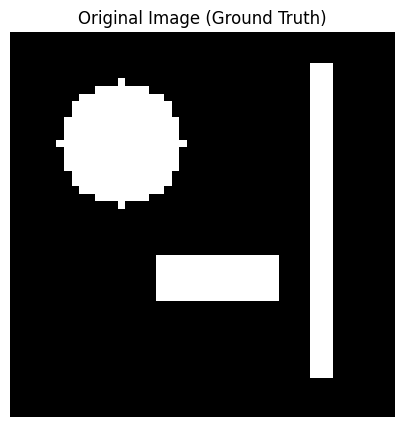

In [7]:
data = scipy.io.loadmat('cs.mat')
x_true = data['img'].reshape(-1)

plt.figure(figsize=(5, 5))
plt.imshow(x_true.reshape(50, 50), cmap='gray')
plt.title("Original Image (Ground Truth)")
plt.axis("off")
plt.show()

In [8]:
n, p = 1300, 2500
A = np.random.normal(0, 1, (n, p))
epsilon = np.random.normal(0, np.sqrt(25), n)
y = A @ x_true + epsilon

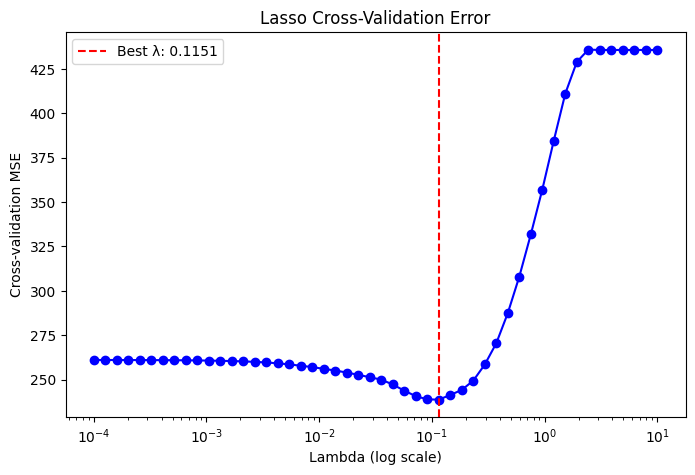

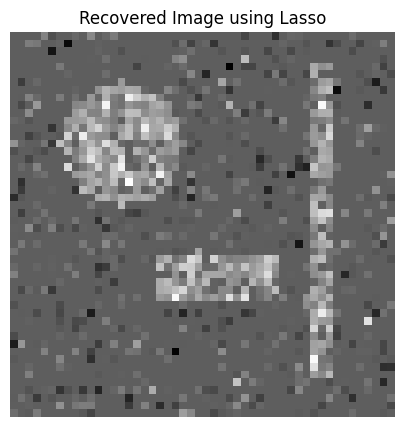

In [9]:
lasso_cv = LassoCV(alphas=np.logspace(-4, 1, 50), cv=10, max_iter=5000, n_jobs=-1)
lasso_cv.fit(A, y)
x_lasso = lasso_cv.coef_

plt.figure(figsize=(8, 5))
plt.plot(lasso_cv.alphas_, np.mean(lasso_cv.mse_path_, axis=1), marker='o', linestyle='-', color='b')
plt.axvline(lasso_cv.alpha_, linestyle="--", color="r", label=f"Best λ: {lasso_cv.alpha_:.4f}")
plt.xscale('log')
plt.xlabel("Lambda (log scale)")
plt.ylabel("Cross-validation MSE")
plt.title("Lasso Cross-Validation Error")
plt.legend()
plt.show()

plt.figure(figsize=(5, 5))
plt.imshow(x_lasso.reshape(50, 50), cmap='gray')
plt.title("Recovered Image using Lasso")
plt.axis("off")
plt.show()

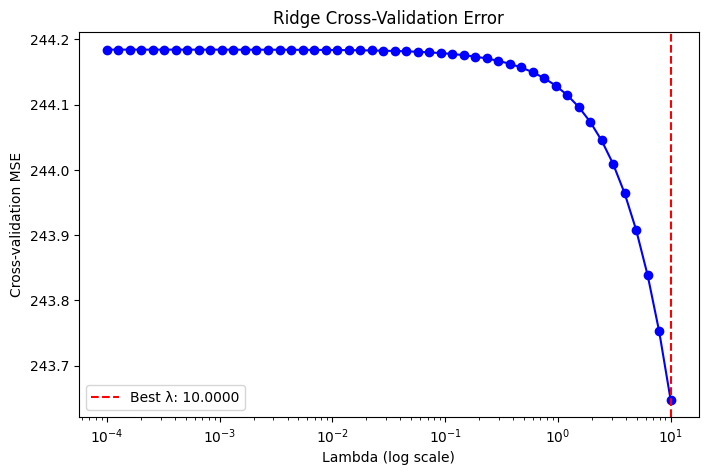

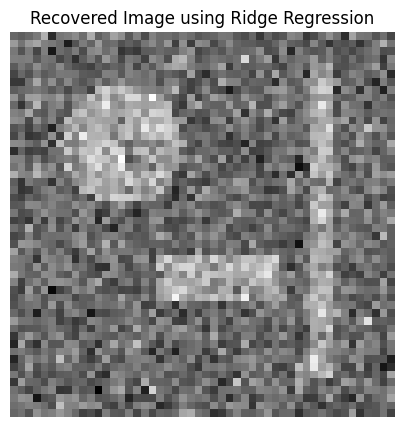

In [10]:
ridge_cv = RidgeCV(alphas=np.logspace(-4, 1, 50), store_cv_values=True)
ridge_cv.fit(A, y)
x_ridge = ridge_cv.coef_

ridge_mse = np.mean(ridge_cv.cv_values_, axis=0)

plt.figure(figsize=(8, 5))
plt.plot(np.logspace(-4, 1, 50), ridge_mse, marker='o', linestyle='-', color='b')
plt.axvline(ridge_cv.alpha_, linestyle="--", color="r", label=f"Best λ: {ridge_cv.alpha_:.4f}")
plt.xscale('log')
plt.xlabel("Lambda (log scale)")
plt.ylabel("Cross-validation MSE")
plt.title("Ridge Cross-Validation Error")
plt.legend()
plt.show()

plt.figure(figsize=(5, 5))
plt.imshow(x_ridge.reshape(50, 50), cmap='gray')
plt.title("Recovered Image using Ridge Regression")
plt.axis("off")
plt.show()

In [12]:
print(f"Lasso Optimal Lambda: {lasso_cv.alpha_:.4f}")
print(f"Ridge Optimal Lambda: {ridge_cv.alpha_:.4f}")

lasso_error = np.linalg.norm(x_true - x_lasso, 2)
ridge_error = np.linalg.norm(x_true - x_ridge, 2)

print(f"Lasso Reconstruction Error (L2 Norm): {lasso_error:.4f}")
print(f"Ridge Reconstruction Error (L2 Norm): {ridge_error:.4f}")

if lasso_error < ridge_error:
    print("Lasso produces a better recovered image due to sparsity")
else:
    print("Ridge produces a better recovered image, likely due to better generalization")


Lasso Optimal Lambda: 0.1151
Ridge Optimal Lambda: 10.0000
Lasso Reconstruction Error (L2 Norm): 13.1099
Ridge Reconstruction Error (L2 Norm): 15.3320
Lasso produces a better recovered image due to sparsity
